# Supervised Learning

# Data Dictionary

The data has the following fields:

|Column name | Description |
|------------|-------------|
| `loan_id`  | Unique loan id |
| `gender`   | Gender - `Male` / `Female` |
| `married`  | Marital status - `Yes` / `No` |
| `dependents` | Number of dependents |
| `education` | Education - `Graduate` / `Not Graduate` |
| `self_employed` | Self-employment status - `Yes` / `No` |
| `applicant_income` | Applicant's income |
| `coapplicant_income` | Coapplicant's income |
| `loan_amount` | Loan amount (thousands) |
| `loan_amount_term` | Term of loan (months) |
| `credit_history` | Credit history meets guidelines - `1` / `0` |
| `property_area` | Area of the property - `Urban` / `Semi Urban` / `Rural` | 
| `loan_status` | Loan approval status (target) - `1` / `0` |

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
# Read in the dataset
loan = pd.read_csv('loans.csv')

# Preview the data
loan.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


# Exploratory Data Analysis

We can't just dive straight into machine learning!
We need to understand and format our data for modeling.
What are we looking for?

## Cleanliness

* Are columns set to the correct data type?
* Do we have missing data?

## Distributions

* Many machine learning algorithms expect data that is normally distributed.
* Do we have outliers (extreme values)?

## Relationships

* If data is strongly correlated with the target variable it might be a good feature for predictions!

## Feature Engineering

* Do we need to modify any data, e.g., into different data types (ML models expect numeric data), or extract part of the data?

In [3]:
# Remove the loan_id to avoid accidentally using it as a feature
loan.drop(columns = ['loan_id'], inplace=True)
loan.head()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [4]:
# Counts and data types per column
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              553 non-null    object 
 1   married             553 non-null    object 
 2   dependents          553 non-null    object 
 3   education           553 non-null    object 
 4   self_employed       553 non-null    object 
 5   applicant_income    553 non-null    int64  
 6   coapplicant_income  553 non-null    float64
 7   loan_amount         553 non-null    float64
 8   loan_amount_term    553 non-null    float64
 9   credit_history      553 non-null    float64
 10  property_area       553 non-null    object 
 11  loan_status         553 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 52.0+ KB


In [5]:
# Distributions and relationships
def encode(data):
    encoder = LabelEncoder()
    objects = data.select_dtypes(include=['object'])
    for i in objects:
        data[i] = encoder.fit_transform(data[i])
    return data

In [6]:
# Using our encode funtion on our dataset
loan = encode(loan)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              553 non-null    int64  
 1   married             553 non-null    int64  
 2   dependents          553 non-null    int64  
 3   education           553 non-null    int64  
 4   self_employed       553 non-null    int64  
 5   applicant_income    553 non-null    int64  
 6   coapplicant_income  553 non-null    float64
 7   loan_amount         553 non-null    float64
 8   loan_amount_term    553 non-null    float64
 9   credit_history      553 non-null    float64
 10  property_area       553 non-null    int64  
 11  loan_status         553 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 52.0 KB


In [7]:
#Checking if there is null values
loan.isna().sum()

gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

### Correlation between variables with seaborn heatmap
Seaborn does not calculate the corralations between varaibles in itself
so first we calculate this correlation with the .corr() function to pass to seaborn


<Axes: >

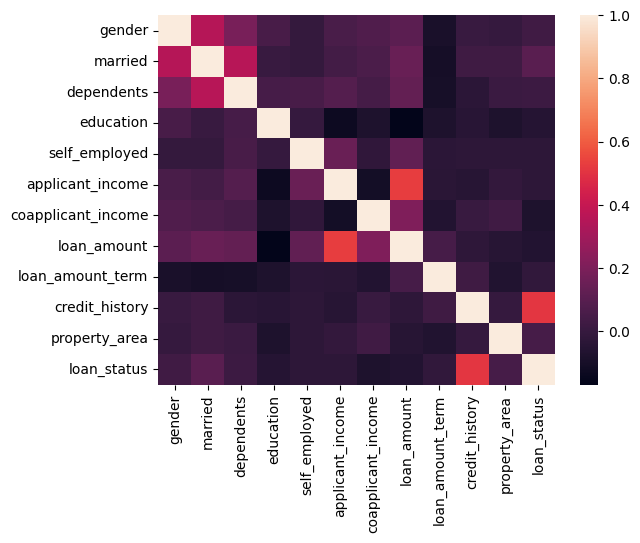

In [8]:
correlation = loan.corr()
sns.heatmap(correlation)

Considering that our target variable is **loan_status**, we need the best variables that correlate the most with it. 

With the plot results, we can see that there is not a lot of variables that inflict in the loan_status, but **credit_history** makes a good corralation of aproximately 0,45 which might be usefull for us.

In [9]:
# Target variable frequency

loan.loan_status.value_counts()

loan_status
1    389
0    164
Name: count, dtype: int64

#### Just for exploratory analysis lets plot a heatmap for the people who have gotten their loan declined, to see if there is any strong corretalion

1. First we need to separete into a new dataset only the people who have been declined, so **loan_status** = 0.
2. Then we make the correlation with the **.corr()** function.
3. And to finish we pass this correlation to the sns.heatmap function.

In [10]:
loan_declined = loan[loan['loan_status'] == 0]
loan_declined.head()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
6,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0
12,1,0,0,0,0,1853,2840.0,114.0,360.0,1.0,0,0
16,0,0,0,0,0,3510,0.0,76.0,360.0,0.0,2,0


<Axes: >

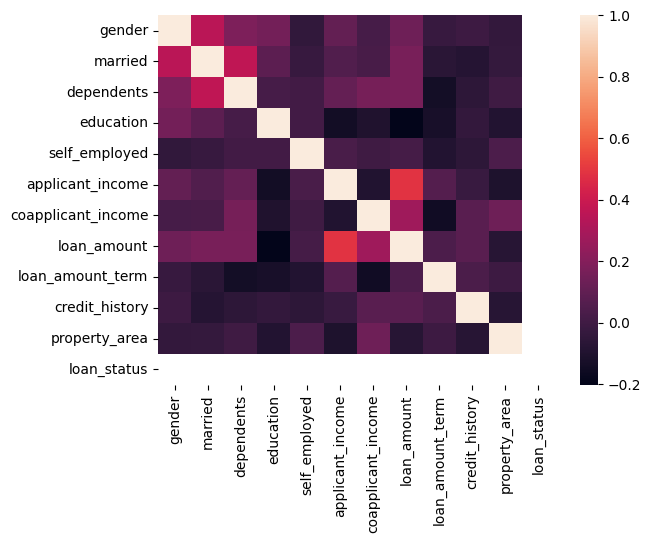

In [11]:
coralation_declined = loan_declined.corr()
sns.heatmap(coralation_declined)

#### Lets make our model with the Logistic Regression function

1. First we separate the **X** values and the **y (target)**value.
2. Then we use the **train_test_split** function to separate the values into **Train and Test**.
3. To create our model we need to instantiate the function, creating a variable to it.
4. With the model instantiated we fit it with the **X_train and y_train**
5. At last we predict the test variables with **model.predict(X_test)**


In [12]:
# 1
X = loan.drop(columns = ['loan_status'])
y = loan['loan_status']

In [13]:
# 2
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
# 3
clf = LogisticRegression(random_state = 42)

In [15]:
# 4
clf.fit(X_train, y_train)

/Users/leoareias/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [16]:
# 5
y_predictions = clf.predict(X_test)

#### Lets see how well the model did

* For that we need to import the **metrics** function from the sklearn library.
* In this function we can use the **classification_report** to see our models results.

In [17]:
from sklearn import metrics
classification_report = metrics.classification_report(y_test, y_predictions)
print(classification_report)

              precision    recall  f1-score   support

           0       0.82      0.39      0.53       130
           1       0.79      0.96      0.87       312

    accuracy                           0.80       442
   macro avg       0.81      0.68      0.70       442
weighted avg       0.80      0.80      0.77       442



#### Understanding our metrics

* **Precision** (Measures how many of the predicted positives were actually correct)
    1. Class 0: 0.82 → When the model predicts class 0, it is correct 82% of the time.
    2. Class 1: 0.79 → When the model predicts class 1, it is correct 79% of the time.

* **Recall** (Measures how many actual positives were correctly predicted)
    1. Class 0: 0.39 → The model only identifies 39% of actual class 0 samples.
    2. Class 1: 0.96 → The model correctly finds 96% of all class 1 samples.

* **F1-Score** (Balances precision and recall. A high F1-score means the model is good at both)
    1. Class 0: 0.53 → The model struggles with class 0 because recall is low.
    2. Class 1: 0.87 → The model performs well in predicting class 1.

* **Support** (Number of actual instances for each class)
    1. Class 0: 130 samples
    2. Class 1: 312 samples


#### Key Observations:

* The model performs much better on class 1 than on class 0.

* Class 0 has low recall (0.39), meaning the model misses a lot of actual class 0 instances.

* Class 1 has high recall (0.96), meaning it correctly identifies almost all class 1 instances.

* Precision is similar for both classes, but because recall for class 0 is low, its F1-score is also lower.

#### Potential Issues & Fixes:

* The model might be biased towards class 1 because it has more samples (312 vs. 130).